![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(a, b): return np.isclose(a, b, atol=1e-12, rtol=1e-12)

# A convergência do método de Newton

## Questão 1: Lista de iterados do método de Newton

Dê abaixo o método de Newton, começando a partir do ponto x0, e retornando a lista de todos os pontos gerados.
O método para quando:
- ou o tamanho do passo é menor do que `atol`;
- ou o tamanho do passo, relativo ao (valor absoluto do) próximo iterado, é menor do que `rtol`;
- ou forem realizadas mais do que `maxiter` iterações.

In [3]:
def newton(f, df, x0, atol=1e-8, rtol=1e-8, maxiter=100):
    pontos = [x0]
    
    for i in range(maxiter):
        passo1 = f(x0)/df(x0)
        xnext = x0 - passo1
        passo2 = f(xnext)/df(xnext)
        pontos.append(xnext)

        if abs(passo1) < atol or abs(passo1 - passo2) < rtol:
            break
        
        x0 = xnext
        
    
    return pontos

In [4]:
L = newton(np.sin, np.cos, 3)


In [5]:
L = newton(np.sin, np.cos, 3)
assert len(L) == 4
assert np.isclose(L[-1], np.pi)

In [6]:
assert np.isclose(L[-2], np.pi)
assert not veryclose(L[-2], np.pi)

In [7]:
def poly1(x): return x**3 - x + 1

Dê a derivada da função acima

In [8]:
def d_poly1(x): return 3*x**2 -1

In [9]:
L = newton(poly1, d_poly1, 1, atol=1e-9)
assert len(L) == 22
assert abs(poly1(L[-1])) < 1e-8

## Questão 2: Olhando uma convergência

Observe o gráfico dos iterados produzidos pelo método.
Como se deu a convergência?

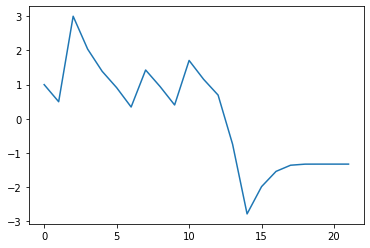

In [10]:
plt.plot(L)

Provavelmente, a função possui oscilações perto da raiz e o chute inicial não foi perto o suficiente para convergir rapidamente. 

Faça um gráfico da função polinomial que ajude a entender porque isso aconteceu.

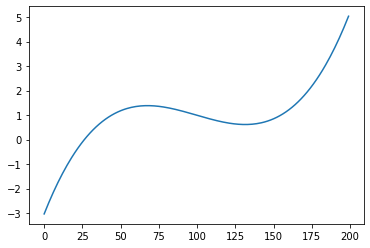

In [11]:
# YOUR CODE HERE
pontos = np.linspace(-1.8, 1.8, 200)
y = poly1(pontos)

plt.plot(y)

ax = plt.gca()

In [12]:
l = ax.lines[0]

valores = l.get_ydata()
assert -8 < min(valores) < -1
assert 10 > max(valores) > 2

O que você deduz?

Que realmente as oscilações perto da raiz, atrapalham o método de newton.

## Pontos periódicos

É possível que, após 2 iterações do Método de Newton, estejamos próximos do ponto inicial.
Se "acertarmos a mira", voltaremos exatamente ao ponto inicial.

## Questão 3: Equação de pontos periódicos

Determine uma equação **polinomial** que é satisfeita por um ponto 2-periódico para o método de Newton,
aplicado à função polinomial $x^3 - x + 1$.

Sugestão:
- Primeiro, deixe em função de uma variável $y$ que representa o "próximo ponto", e simplifique o que puder.
- Em seguida, substitua $y = N(x)/D(x)$, e elimine os denominadores para obter um polinômio. 

YOUR ANSWER HERE

Qual o grau deste polinômio?

YOUR ANSWER HERE

Agora, defina este polinômio.

Dica: use o numerador e denominador como variáveis intermediárias!

In [13]:
def periodo2(x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [14]:
assert 0.1 < periodo2(1/np.sqrt(3)) < 10

NotImplementedError: 

## Questão 4: Análise dos pontos de período 2

Faça um gráfico deste polinômio.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Faça mais um gráfico, que (junto com o anterior) convença você que este polinômio só tem uma raiz.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Que raiz é esta?
Porque este ponto de período 2 faz sentido?

YOUR ANSWER HERE

## Questão 5: Zeros duplos

Vamos usar Newton fora das hipóteses de convergência quadrática...

In [ ]:
def p2(x): return (x - 3)**2
def dp2(x): return 2*x - 6

L = newton(p2, dp2, 4, atol=1e-12, rtol=1e-12)
assert len(L) == 40

Faça um gráfico da convergência dos erros

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
l = ax.get_lines()[0]
values = l.get_ydata()

assert len(values) == 40
assert max(values) == 1
assert min(values) < 1e-10

In [ ]:
assert len(ax.get_xlabel()) > 5

Qual a velocidade de convergência destas iterações?

YOUR ANSWER HERE

Qual a fórmula exata do "próximo ponto" para este caso?
Como isso explica o resultado acima?

YOUR ANSWER HERE